In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pew = pd.read_csv('data/pew_ratings.csv')
pew.Date = pd.to_datetime(pew['Date'] + ' 1, 2022', format='%B %d, %Y')

In [3]:
#pew.head()

In [4]:
bar = alt.Chart(pew).mark_bar().encode(
    x = 'issue:N',
    y='Value:Q',
    color=alt.Color('Party :N' ,scale=alt.Scale(range= ['blue', 'red'])),
    column = 'Date:N'
)
bar.show()

Displaying chart at http://localhost:49222/


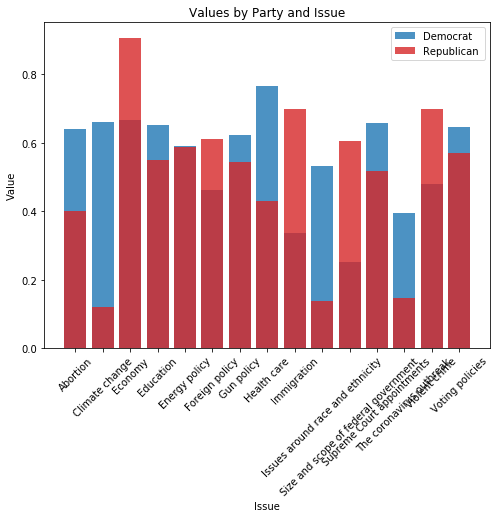

In [5]:
# set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# width of the bars for shifting 
width = 0.35 

# group the data by issue and Party and get the mean value
grouped_data = pew.groupby(['issue', 'Party '])['Value'].mean().reset_index()

# set up the color map for the bars
colors = {'Republican ': 'tab:red', 'Democrat': 'tab:blue'}

# create the bar chart
for i, (party, group) in enumerate(grouped_data.groupby('Party ')):
    ax.bar(x=group['issue'], height=group['Value'], color=colors[party], alpha=0.8, label=party)

# set the title and labels
ax.set_title('Values by Party and Issue')
ax.set_xlabel('Issue')
ax.set_ylabel('Value')


# rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# show the legend
ax.legend()

# show the plot
plt.show()

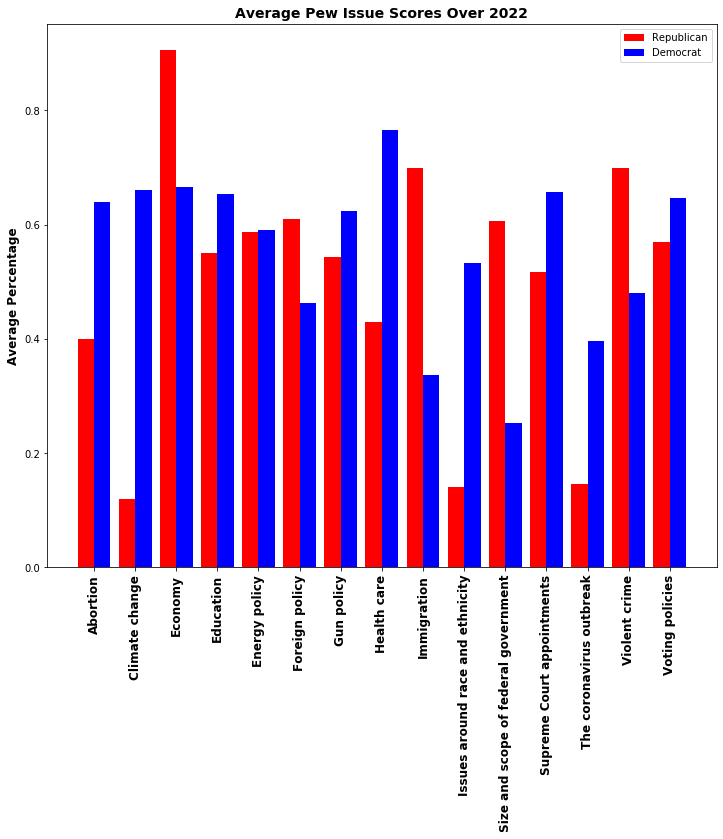

In [6]:

# set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# width of the bars for shifting 
width = 0.4 

# group the data by issue and Party and get the mean value
grouped_data = pew.groupby(['issue', 'Party '])['Value'].mean().reset_index()

Republican = grouped_data[grouped_data['Party ']== 'Republican '].Value
Democrat =grouped_data[grouped_data['Party ']== 'Democrat'].Value

# x locations for group
ind = np.arange(len(Republican)) 

# set up plots
rects1 = ax.bar(ind, Republican, width, color='r')

rects2 = ax.bar(ind + width, Democrat, width, color='b')


# add some text for labels, title and axes ticks
ax.set_ylabel('Average Percentage', fontsize=12, fontweight='bold')
ax.set_title('Average Pew Issue Scores Over 2022', fontsize=14, fontweight='bold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(grouped_data[grouped_data['Party ']=='Republican '].issue[:15], fontsize=12, fontweight='bold')

ax.legend((rects1[0], rects2[0]), ('Republican', 'Democrat'))

# rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# show the plot
plt.show()